In [1]:
import stlearn as st
data = st.read.file_10x_h5("/home/d.pham/Downloads/V1_Breast_Cancer_Block_A_Section_1_filtered_feature_bc_matrix.h5")
data.var_names_make_unique()
st.add.image(adata=data, imgpath="/home/d.pham/10X/BCBA/spatial/tissue_lowres_image.png")
st.add.positions(data,position_filepath = "/home/d.pham/10X/BCBA/spatial/tissue_positions_list.csv",
                scale_filepath = "/home/d.pham/10X/BCBA/spatial/scalefactors_json.json",
                quality="low")
st.pp.filter_genes(data,min_cells=3)
st.pp.normalize_total(data)
st.pp.log1p(data)
st.pp.scale(data)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.uns` of view, copying.


Added tissue image to the object!
filtered out 12851 genes that are detected in less than 3 cells
normalizing counts per cell
Normalization step is finished in adata.X
Log transformation step is finished in adata.X
Scale step is finished in adata.X


In [3]:
st.tools.microenv.SpatialDE(data)

KeyboardInterrupt: 

In [4]:
st.em.run_pca(data,n_comps=30)
st.pp.neighbors(data,n_neighbors=15)
st.em.run_umap(data)
st.spatial.smooth.disk(data,rates=2,method="median",use_data="X_umap")
st.pp.neighbors(data,n_neighbors=100,use_rep='X_umap_disk')
st.tl.clustering.louvain(data)

PCA is done! Generated in adata.obsm['X_pca'], adata.uns['pca'] and adata.varm['PCs']
Created k-Nearest-Neighbor graph in adata.uns['neighbors'] 
UMAP is done! Generated in adata.obsm['X_umap'] nad adata.uns['umap']
Disk smoothing function is applied! The new data are stored in adata.obsm["X_diffmap_disk"]
Created k-Nearest-Neighbor graph in adata.uns['neighbors'] 
Applying Louvain clustering ...
Louvain clustering is done! The labels are stored in adata.obs['louvain']


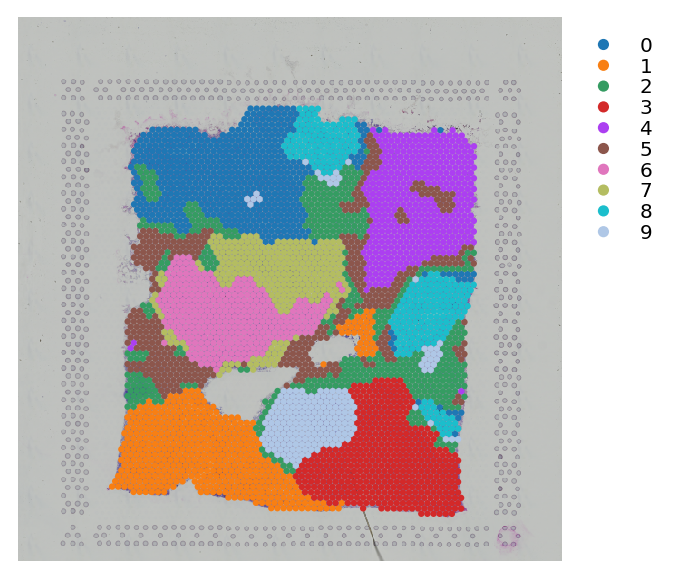

In [5]:
st.pl.cluster_plot(data,use_label="louvain")

In [6]:
st.spatial.trajectory.global_level(data,pseudo_root=5)

... storing 'feature_types' as categorical
... storing 'genome' as categorical


PAGA plot:


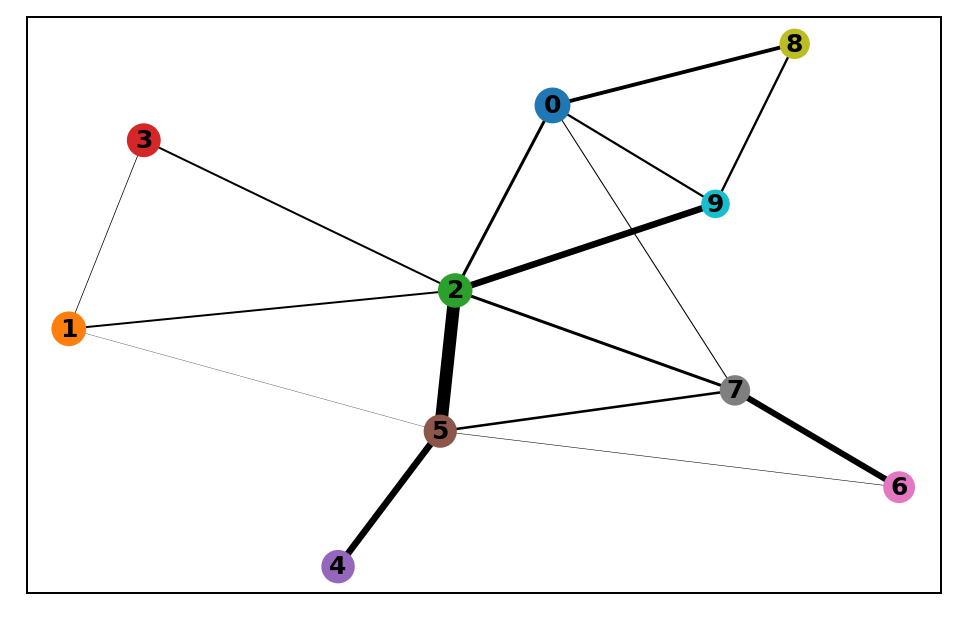

Gene expression (reduced dimension) plot:


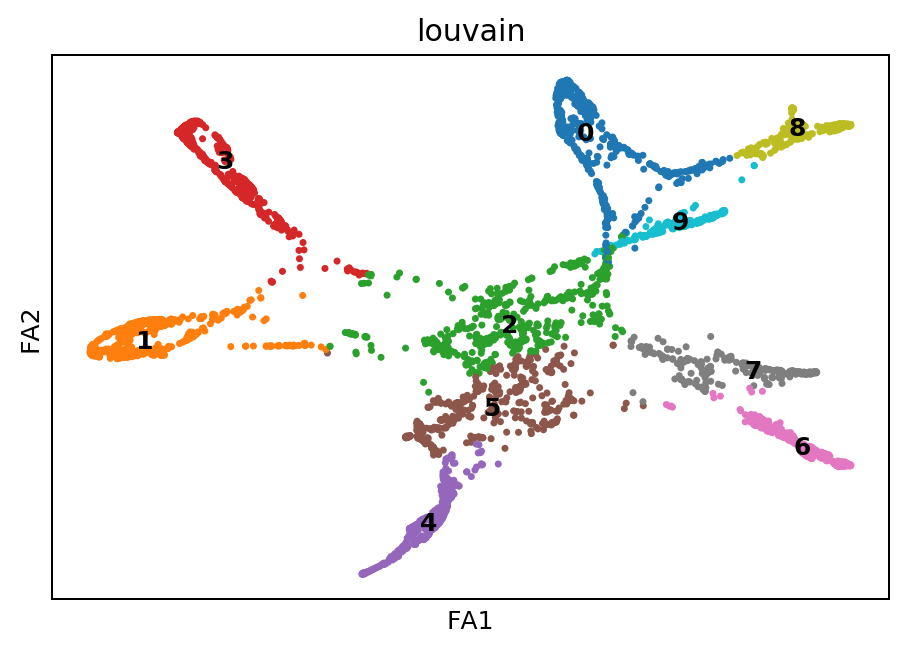

Diffusion pseudotime plot:


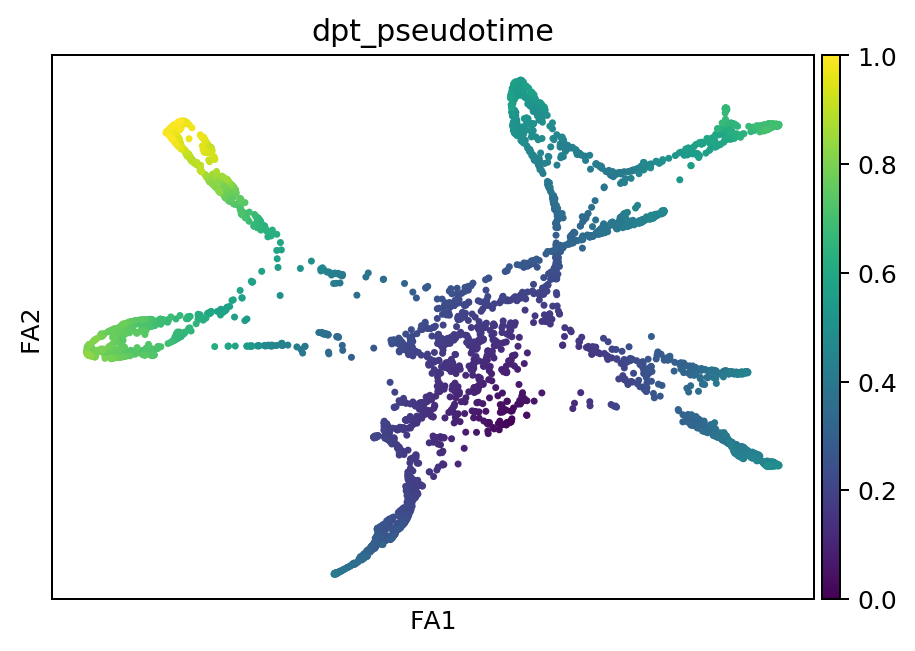

In [5]:
st.pl.non_spatial_plot(data)

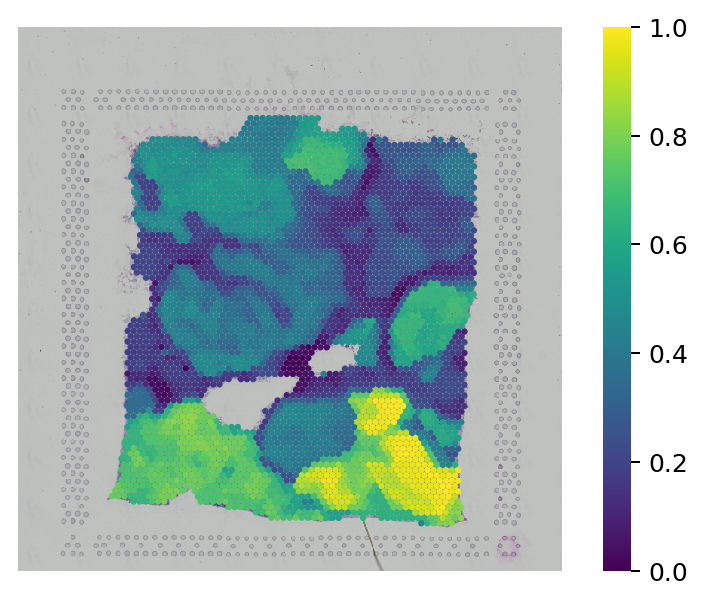

In [6]:
st.pl.trajectory.global_plot(data,list_cluster="all",edge_alpha=0.1,node_alpha=0,show_graph=False)

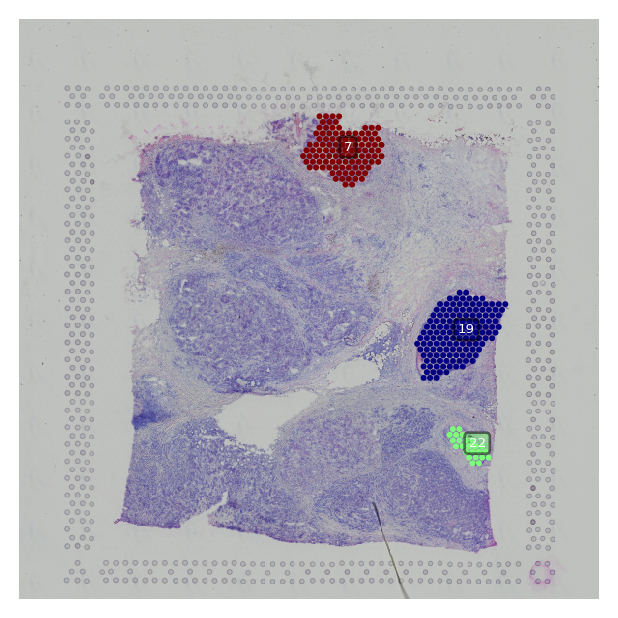

In [7]:
st.pl.subcluster_plot(data,use_label="louvain",cluster=8)

In [8]:
st.spatial.trajectory.local_level(data,cluster=8)

Start construct trajectory for subcluster 8
PCA is done! Generated in adata.obsm['X_pca'], adata.uns['pca'] and adata.varm['PCs']
Created k-Nearest-Neighbor graph in adata.uns['neighbors'] 
Diffusion Map is done! Generated in adata.obsm['X_diffmap'] nad adata.uns['diffmap_evals']
Created k-Nearest-Neighbor graph in adata.uns['neighbors'] 


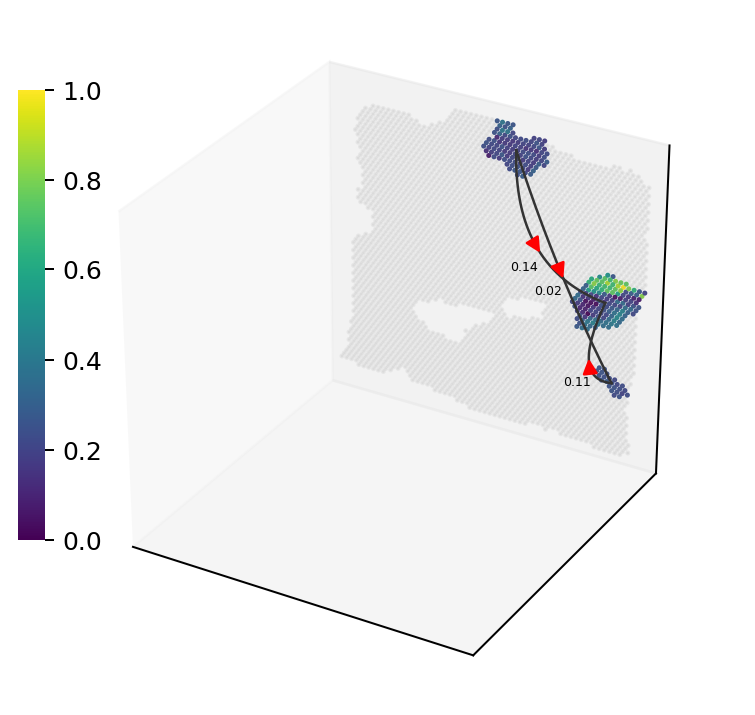

In [14]:
%matplotlib inline
st.pl.trajectory.local_plot(data,cluster=8)

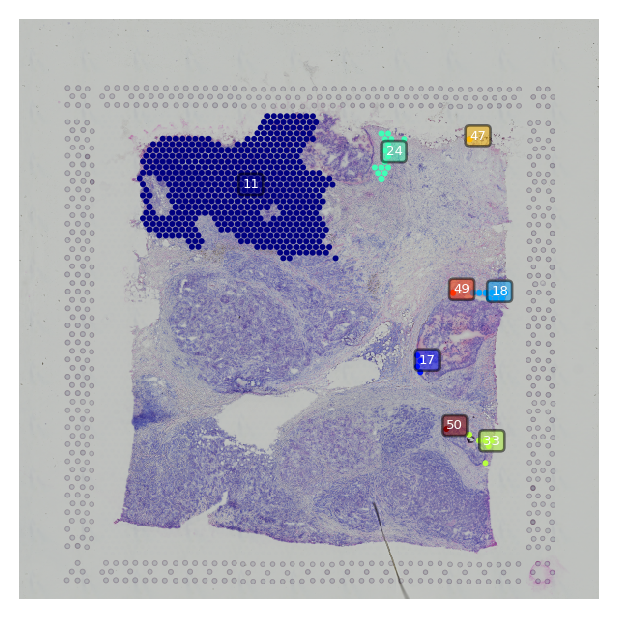

In [20]:
st.pl.subcluster_plot(data,cluster=0)

In [9]:
st.spatial.trajectory.sublocal_level(data,subcluster=11,n_neighbors=100)

Start construct trajectory for subcluster 11
Created k-Nearest-Neighbor graph in adata.uns['neighbors'] 
Applying Louvain clustering ...
Louvain clustering is done! The labels are stored in adata.obs['louvain']
Learning elastic principal graph...
[1] "Generating the initial configuration"
[1] "Creating a chain in the 1st PC with 2 nodes"
[1] "Constructing tree 1 of 1 / Subset 1 of 1"
[1] "The elastic matrix is being used. Edge configuration will be ignored"
[1] "Computing EPG with 20 nodes on 40 points and 2 dimensions"
[1] "Using a single core"
Nodes = 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 
BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD
0||20	443	20	19	18	0	0	0	237.9	NA	0.9462	NA	192.1	12.95	259	5181	0
0.372 sec elapsed
Number of branches after learning elastic principal graph: 1


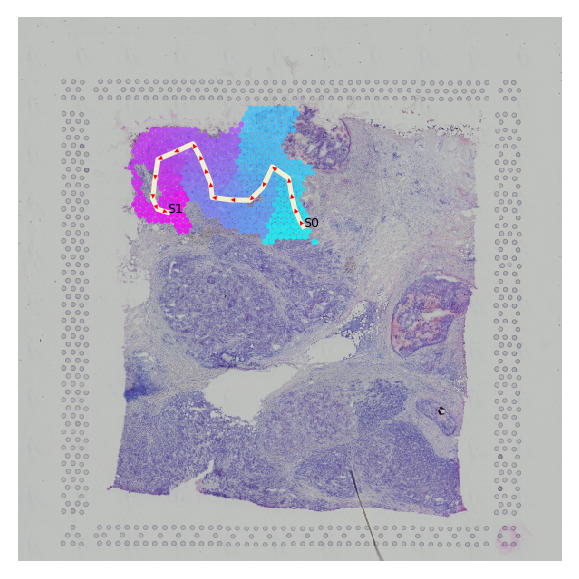

In [10]:
st.pl.trajectory.sublocal_plot(data,subcluster=11,show_root=True,)

In [17]:
data.uns["subcluster_11_adata"]

AnnData object with n_obs × n_vars = 515 × 20687 
    obs: 'imagerow', 'imagecol', 'sum_counts', 'louvain', 'sub_cluster_labels', 'epg_cluster', 'node', 'branch_id', 'branch_id_alias', 'branch_lam', 'branch_dist', 'S0_pseudotime', 'S3_pseudotime', 'S5_pseudotime', 'S2_pseudotime', 'S1_pseudotime', 'S4_pseudotime'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells'
    uns: 'tissue_img', 'log1p', 'pca', 'neighbors', 'umap', 'louvain', 'louvain_sizes', 'split_node', 'global_graph', 'centroid_dict', 'iroot', 'diffmap_evals', 'subcluster_11_pts', 'subcluster_11_adata', 'pseudotimespace'
    obsm: 'filtered_counts', 'X_pca', 'X_umap', 'X_umap_disk', 'X_diffmap'
    varm: 'PCs'

In [18]:
data.uns["subcluster_11_adata"].obs.epg_cluster

AAAGACCCAAGTCGCG-1     0
AAAGGGATGTAGCAAG-1     1
AAAGTCACTGATGTAA-1     2
AAATGCTCGTTACGTT-1     3
AAATGTGGGTGCTCCT-1     4
                      ..
TTGTCGTTCAGTTACC-1    67
TTGTGGCCCTGACAGT-1    19
TTGTTAGCAAATTCGA-1     1
TTGTTCAGTGTGCTAC-1     1
TTGTTTGTGTAAATTC-1     2
Name: epg_cluster, Length: 515, dtype: category
Categories (68, object): [0, 1, 2, 3, ..., 64, 65, 66, 67]

In [26]:
515/7

73.57142857142857

In [19]:
def cal_ncenter(ncells,nodes_per_log10_cells=20):
    import math
    return round(nodes_per_log10_cells * math.log10(ncells))

In [22]:
cal_ncenter(515)

54

In [48]:
import math
math.sqrt(515)*2

45.387222871640866